In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

In [9]:
! cp kaggle.json ~/.kaggle/

In [10]:
! chmod 600 ~/.kaggle/kaggle.json

In [11]:
!kaggle datasets download -d pkdarabi/cardetection

 76% 73.0M/96.6M [00:00<00:00, 159MB/s]
100% 96.6M/96.6M [00:00<00:00, 168MB/s]


In [12]:
!mkdir road_signs

In [ ]:
!unzip cardetection.zip -d road_signs

In [14]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 715.9/715.9 kB 4.2 MB/s eta 0:00:00


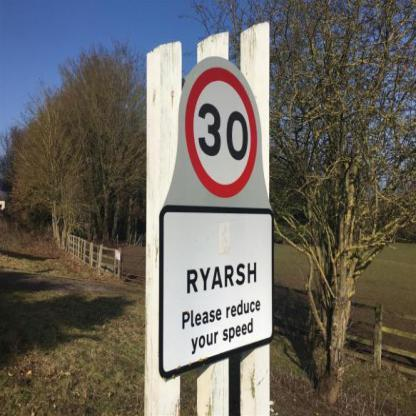

In [33]:
Image(filename = '/content/road_signs/train/images/000000_jpg.rf.b11f308f16626f9f795a148029c46d10.jpg', width = 200)

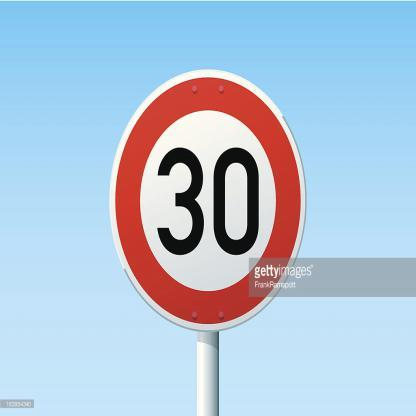

In [32]:
Image(filename = '/content/road_signs/test/images/000003_jpg.rf.8511b9c219dbf9799a6d58900b15917d.jpg', width = 200)

# Training Yolov8 Model

In [16]:
!yolo task=detect mode=train model=yolov8n.pt data=/content/road_signs/data.yaml epochs= 15 imgsz=640

Ultralytics YOLOv8.1.17 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/road_signs/data.yaml, epochs=15, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, s

## Checking Files in Run Directory

In [17]:
!ls /content/runs/detect/train2/

args.yaml					    R_curve.png		 val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_pred.jpg
confusion_matrix.png				    results.png		 val_batch1_labels.jpg
events.out.tfevents.1708578872.777a724f646a.2421.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					    train_batch1105.jpg  val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch1106.jpg  val_batch2_pred.jpg
labels.jpg					    train_batch1107.jpg  weights
P_curve.png					    train_batch1.jpg
PR_curve.png					    train_batch2.jpg


In [18]:
from IPython.display import Image

## Displaying Confusion Matrix

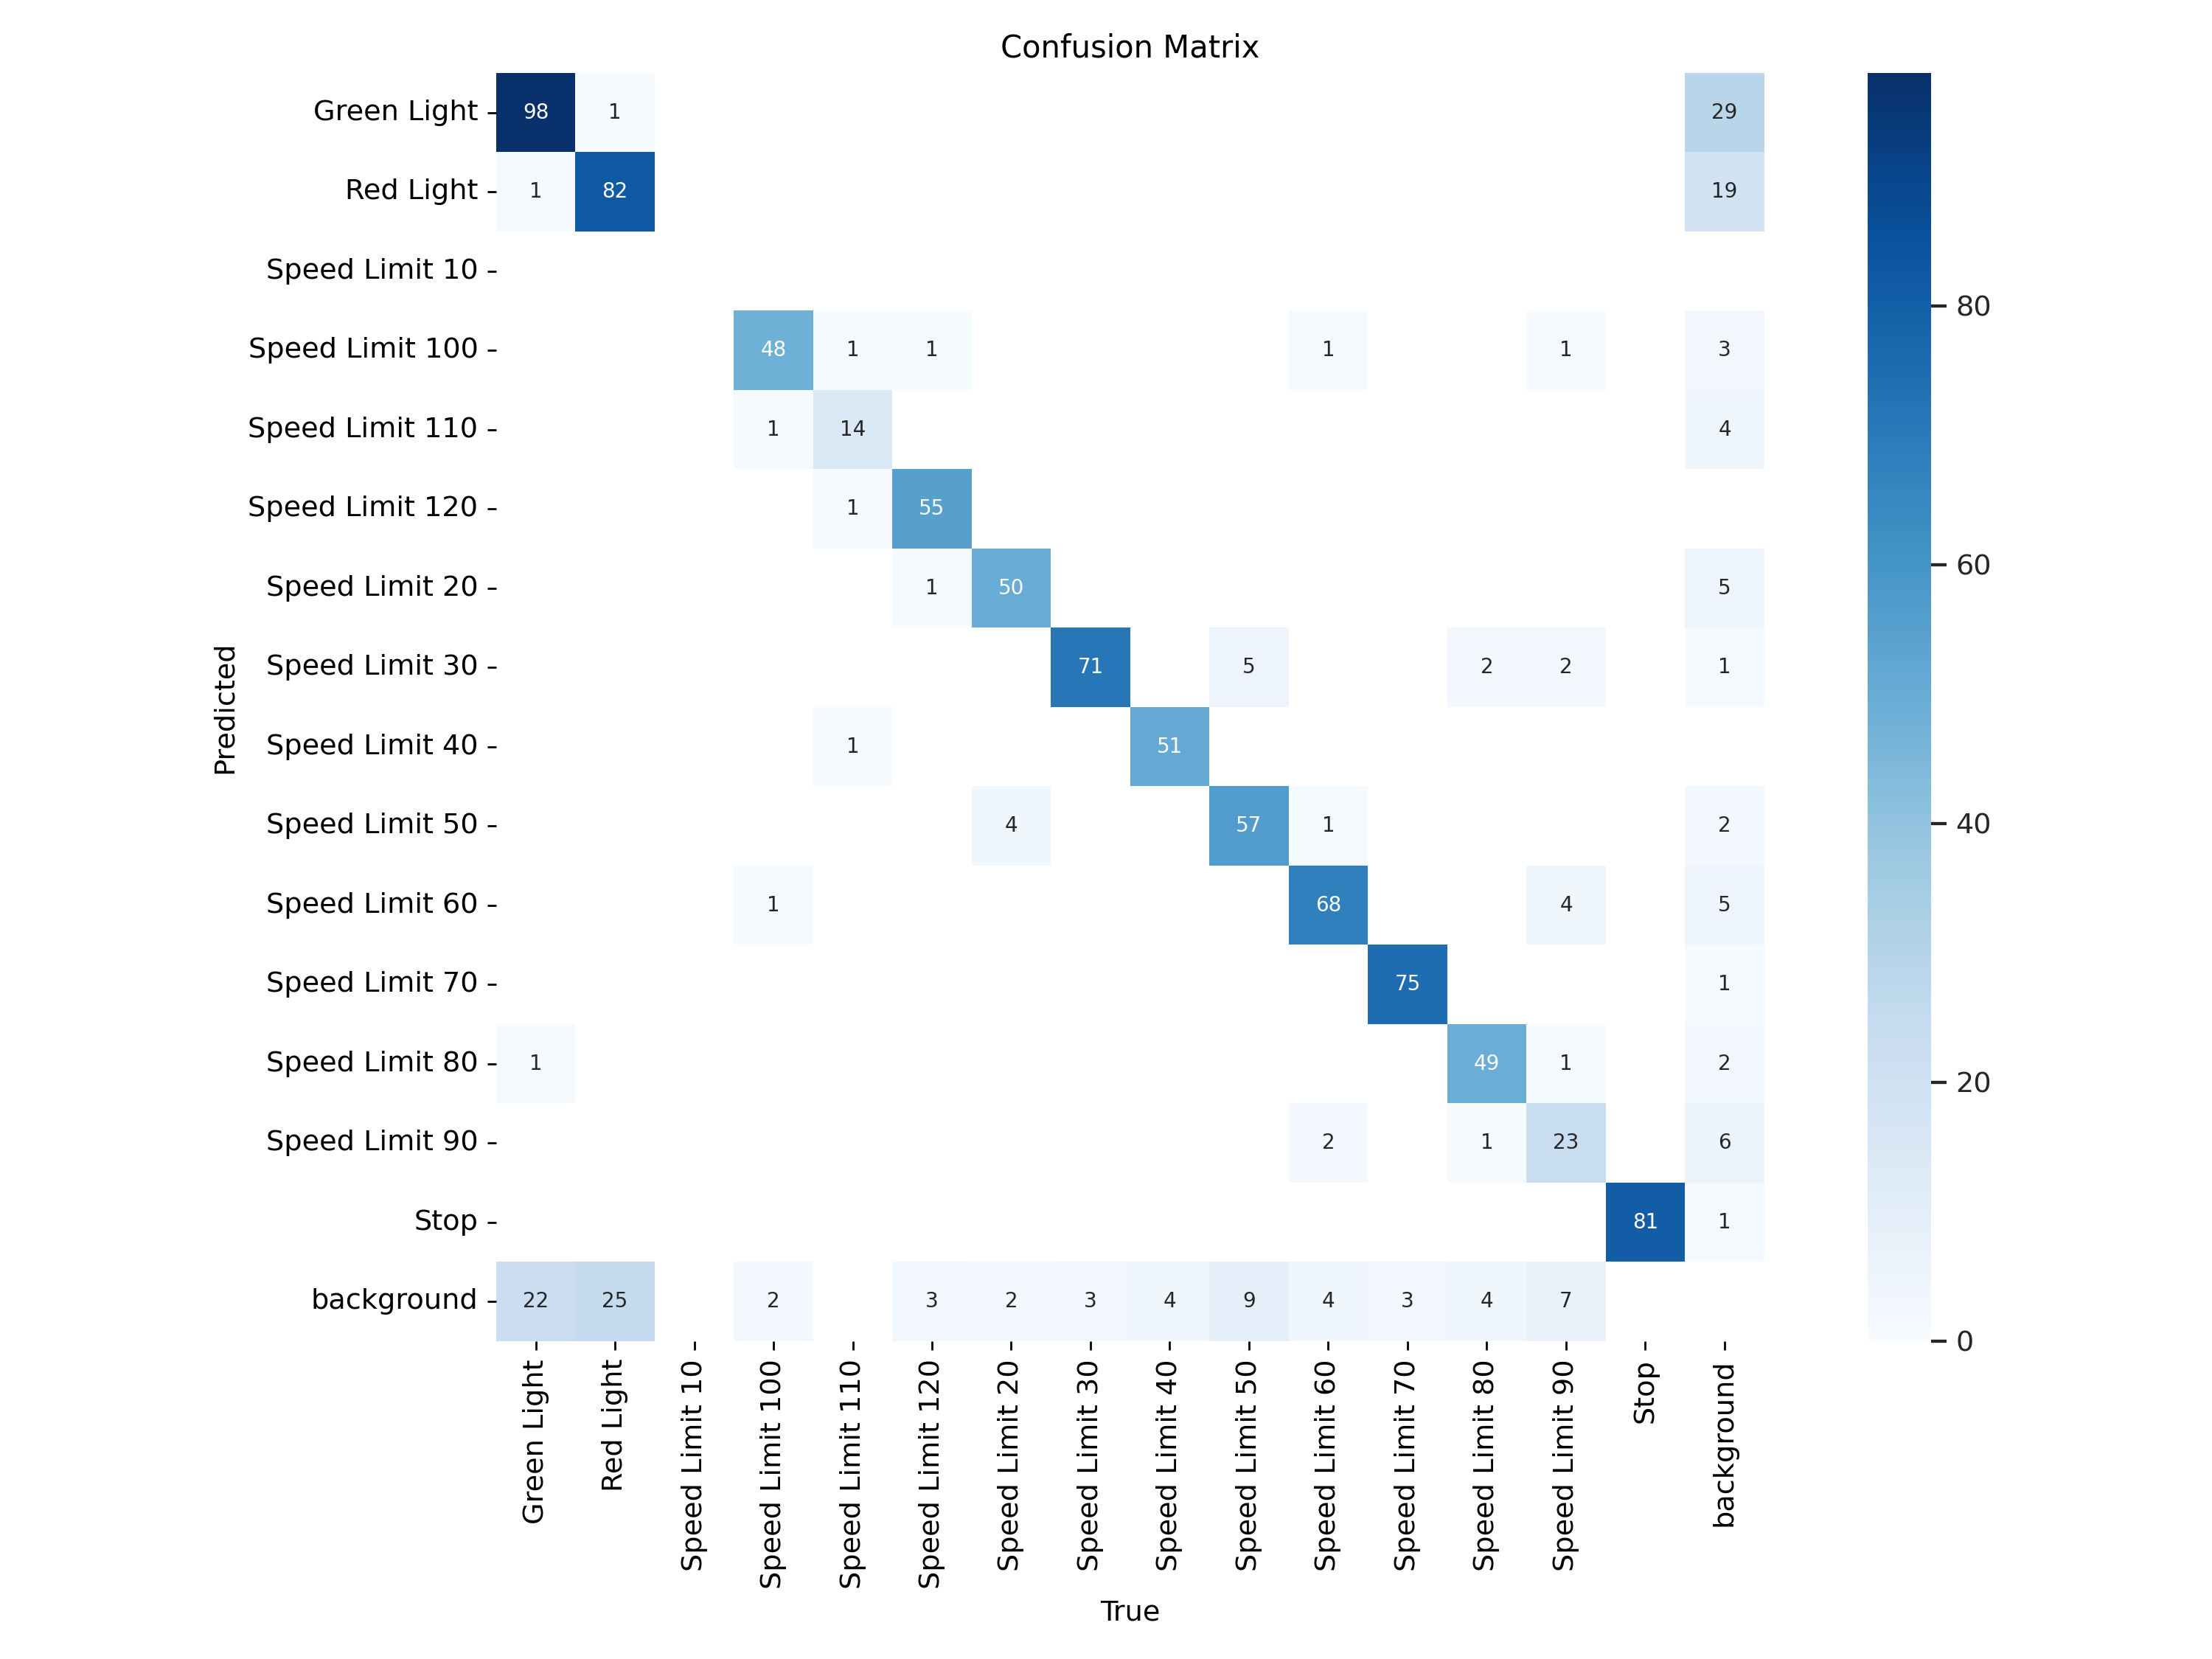

In [19]:
Image(filename = '/content/runs/detect/train2/confusion_matrix.png', width = 500)

## Displaying Result Images

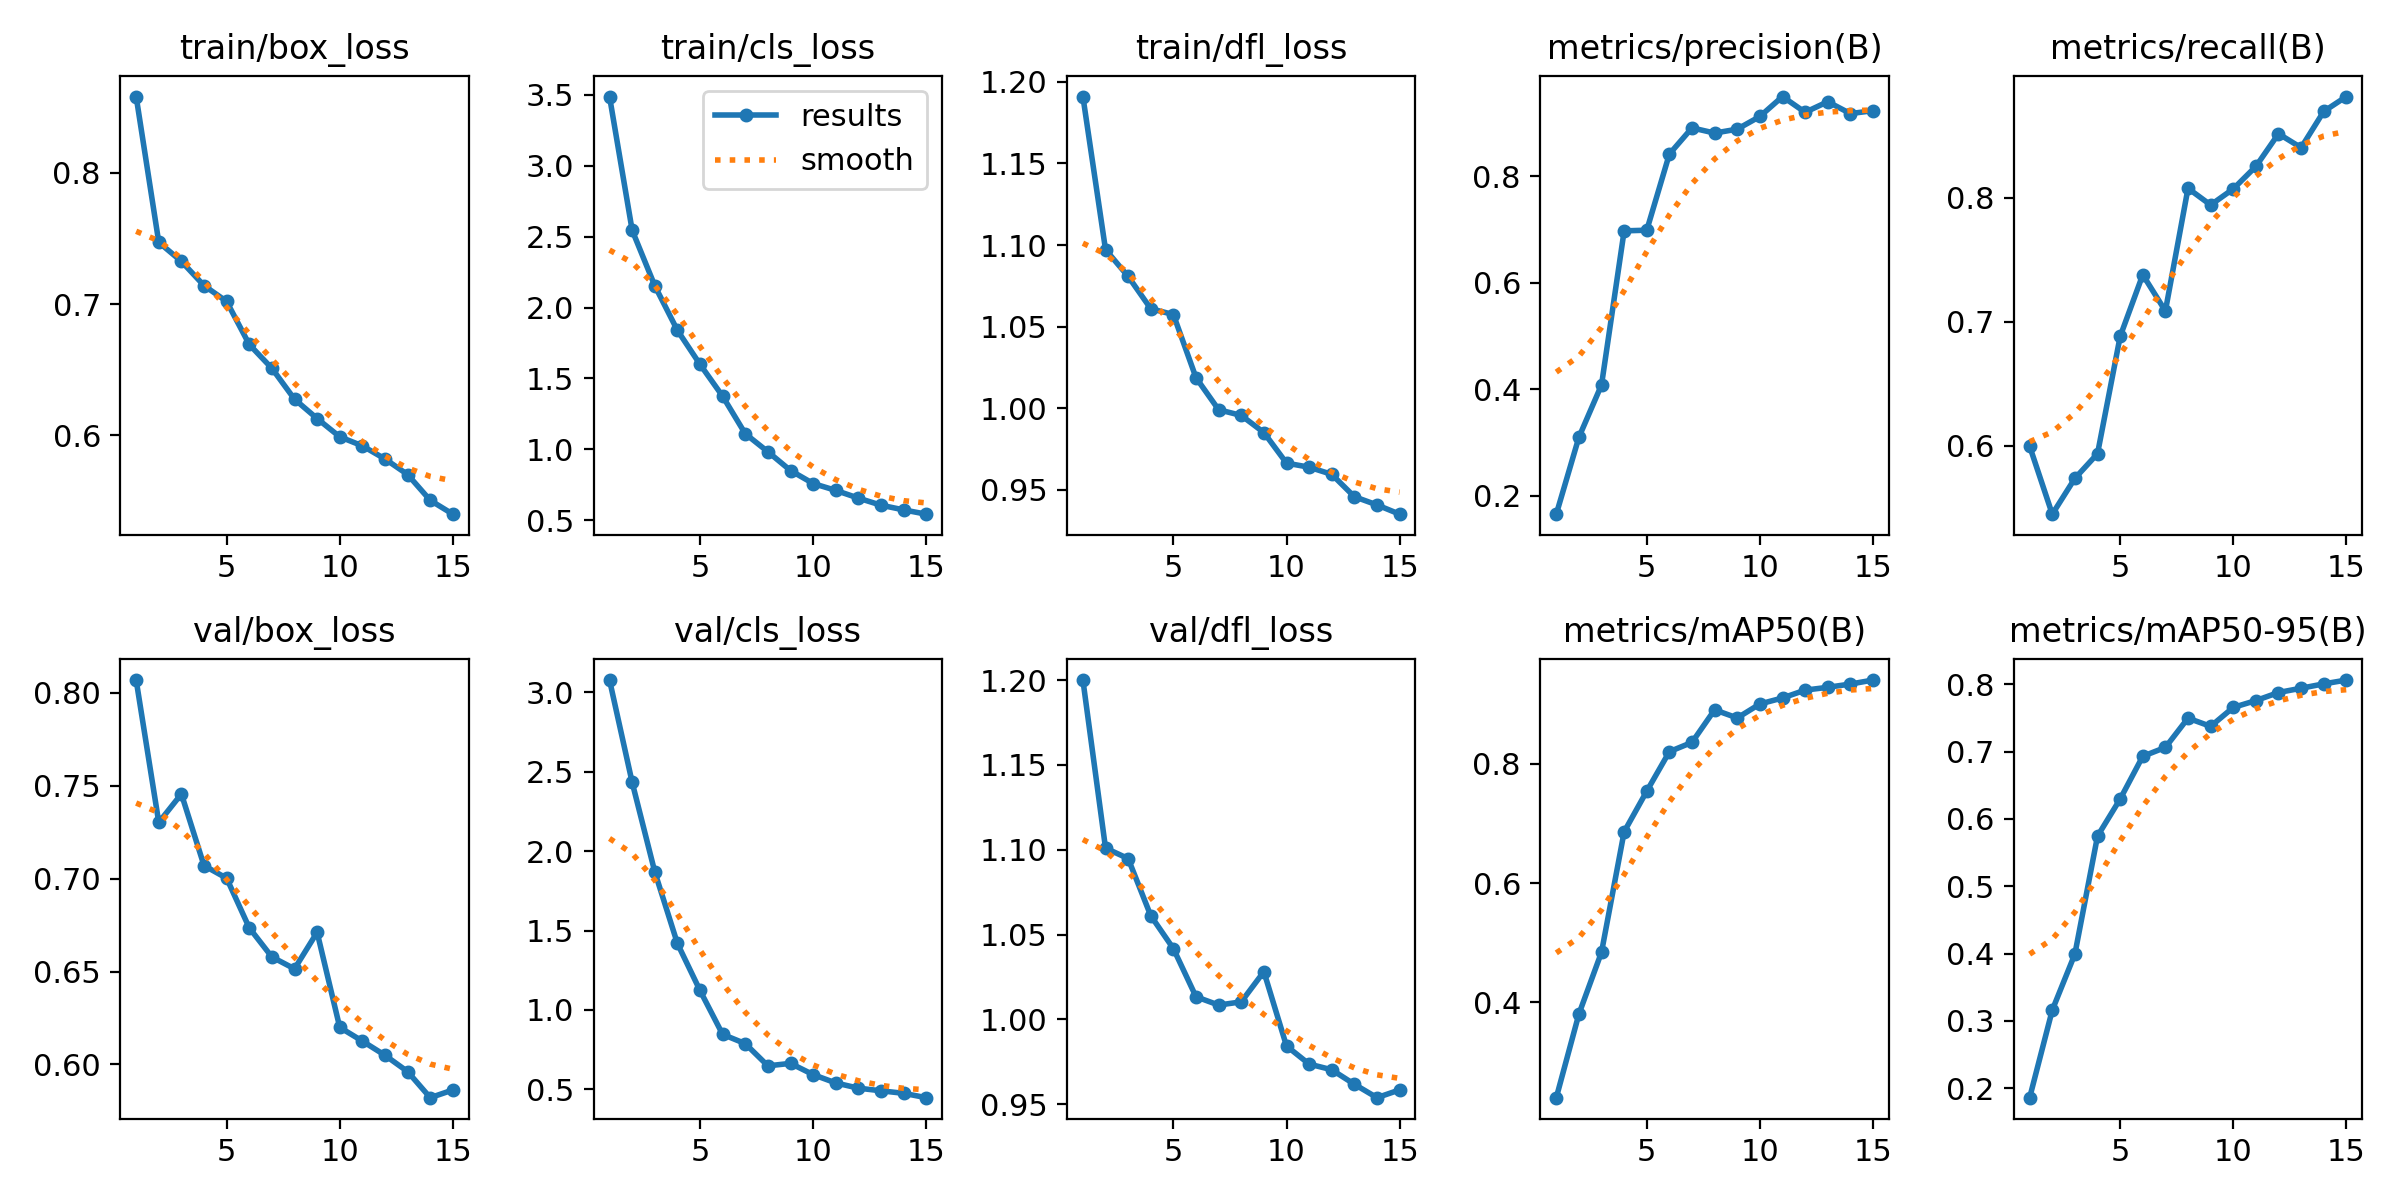

In [20]:
Image(filename = '/content/runs/detect/train2/results.png', width = 500)

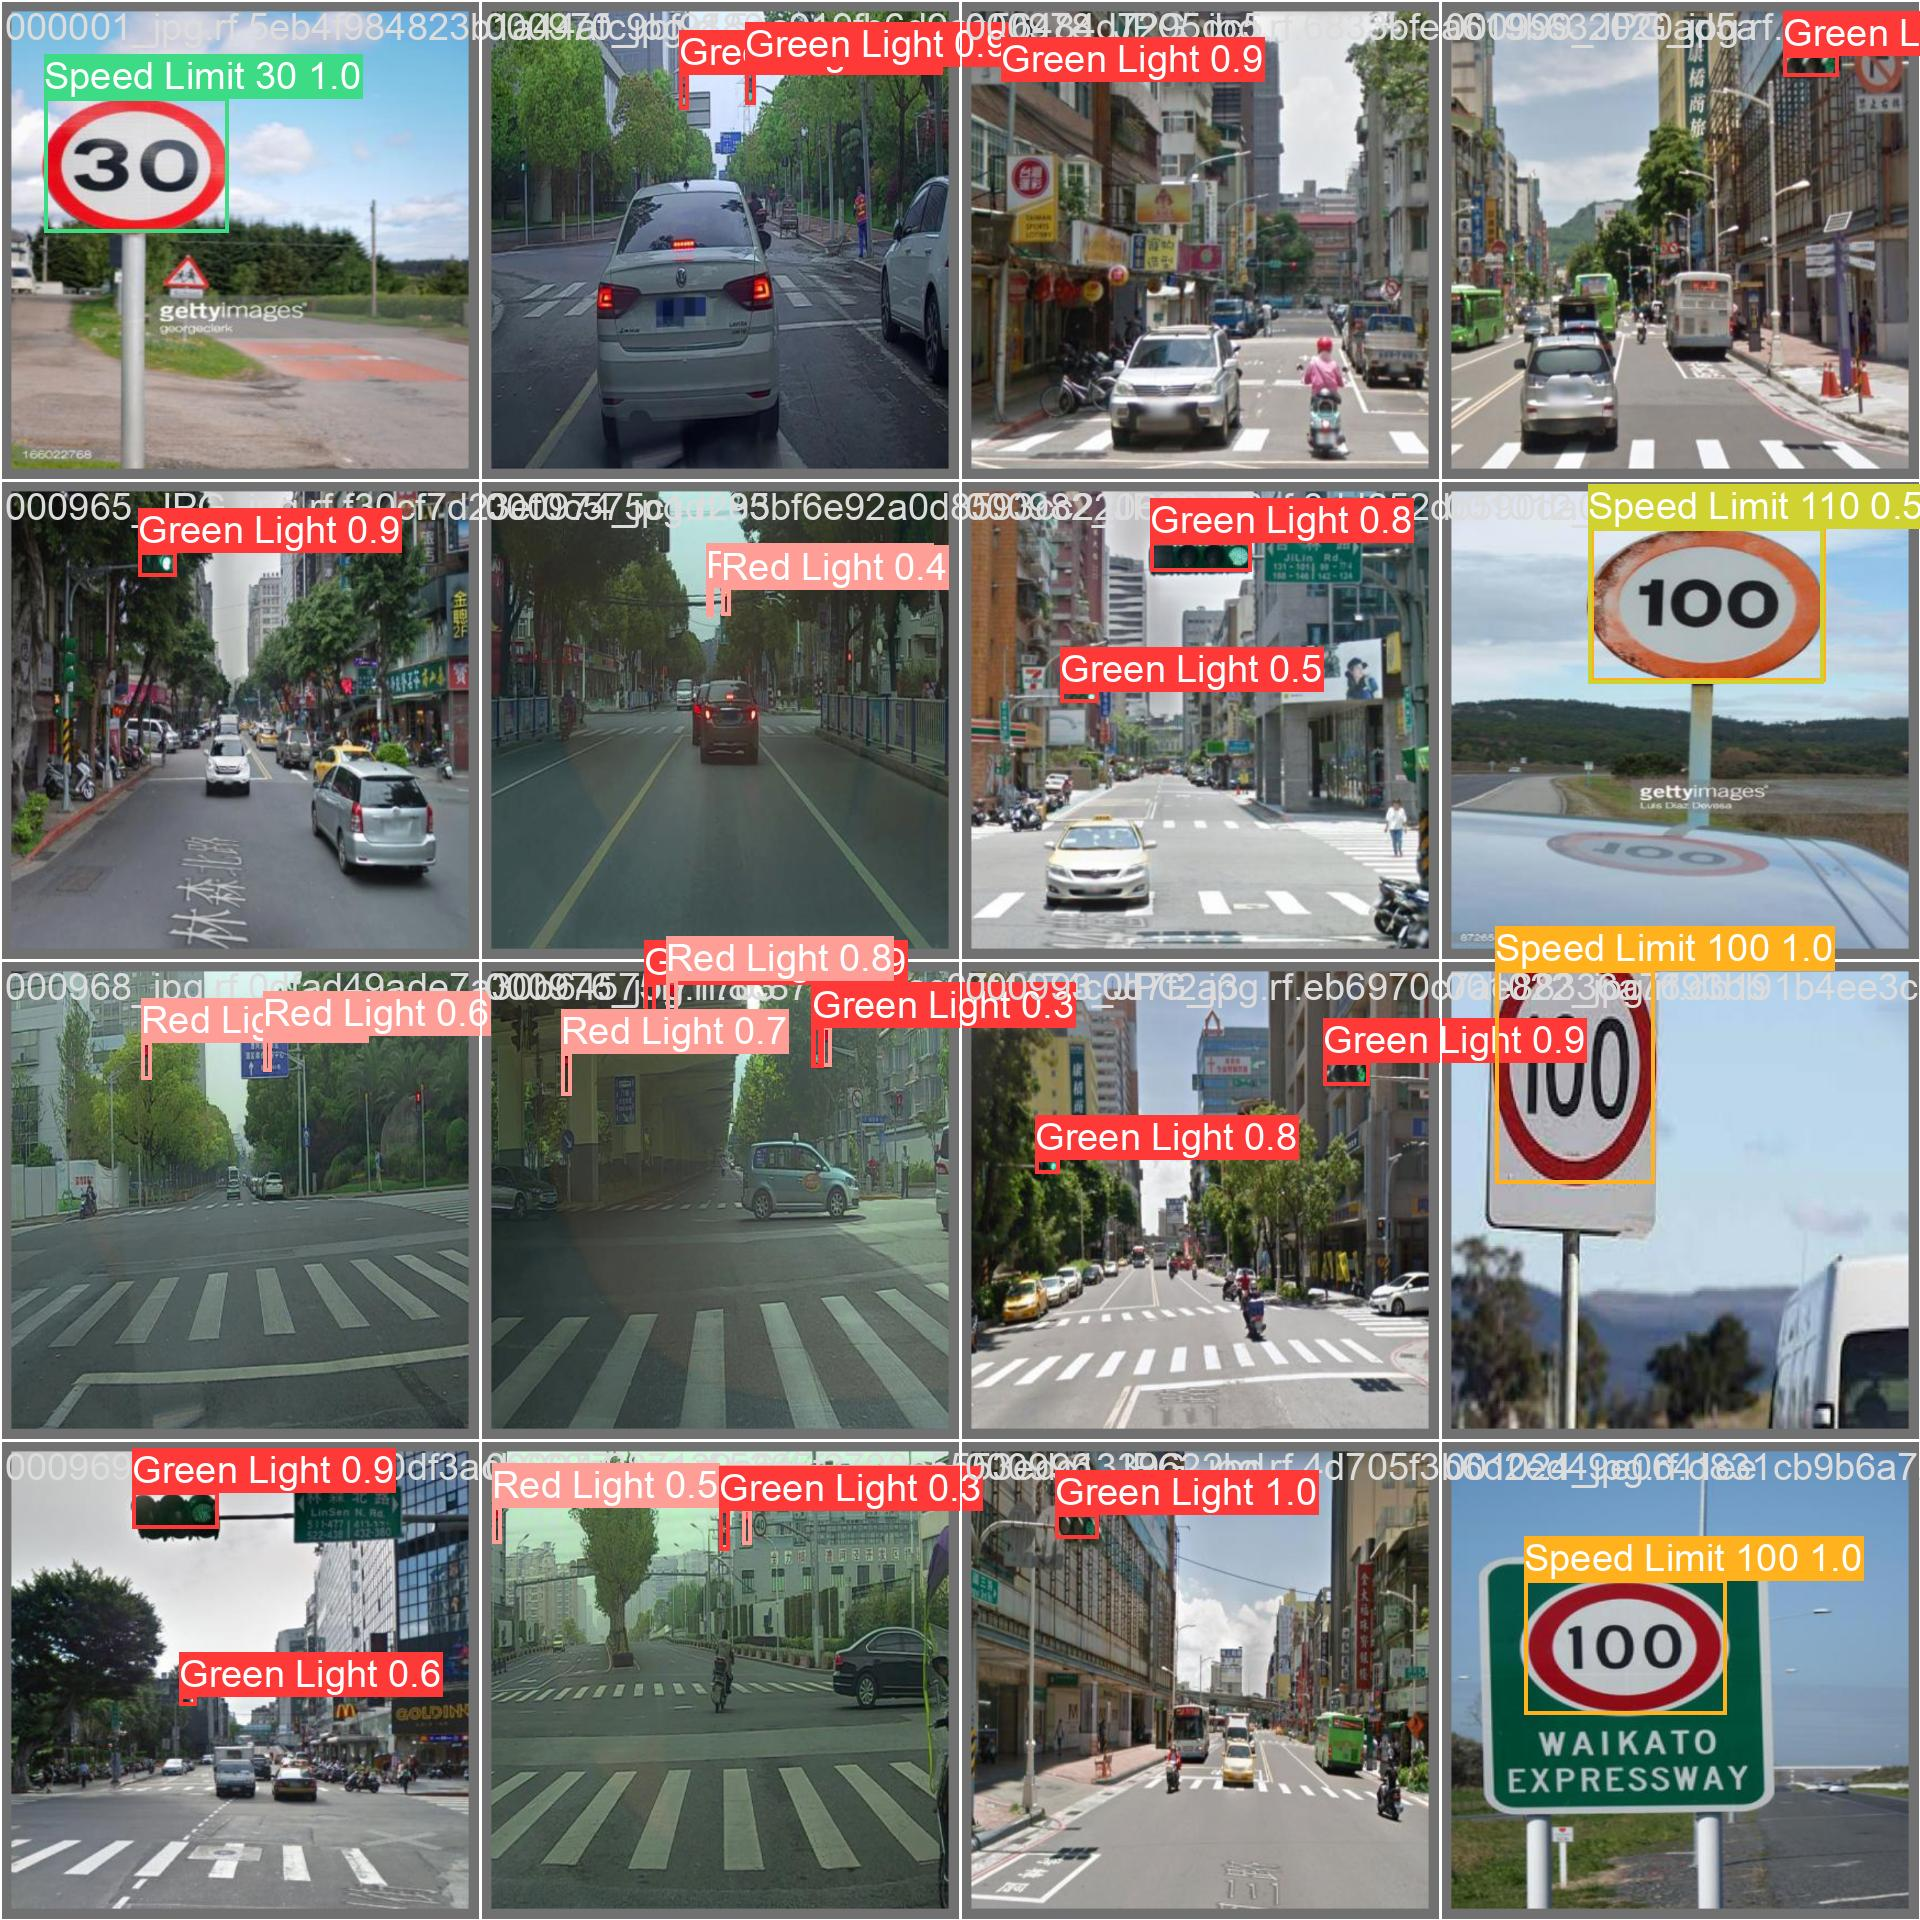

In [21]:
Image(filename = '/content/runs/detect/train2/val_batch0_pred.jpg', width = 500)

## Validating Model

In [23]:
!yolo task=detect mode=val model=/content/runs/detect/train2/weights/best.pt data=/content/road_signs/data.yaml

Ultralytics YOLOv8.1.17 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3008573 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/road_signs/valid/labels.cache... 801 images, 0 backgrounds, 0 corrupt: 100% 801/801 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 51/51 [00:11<00:00,  4.45it/s]
                   all        801        944      0.923      0.882      0.941      0.807
           Green Light        801        122      0.797      0.795      0.818      0.471
             Red Light        801        108      0.807       0.75      0.803      0.479
       Speed Limit 100        801         52      0.956      0.942      0.976      0.889
       Speed Limit 110        801         17      0.885      0.911      0.973      0.873
       Speed Limit 120        801         60      0.982      0.906      0.985      0.898
        Speed Limit 20        801         56      

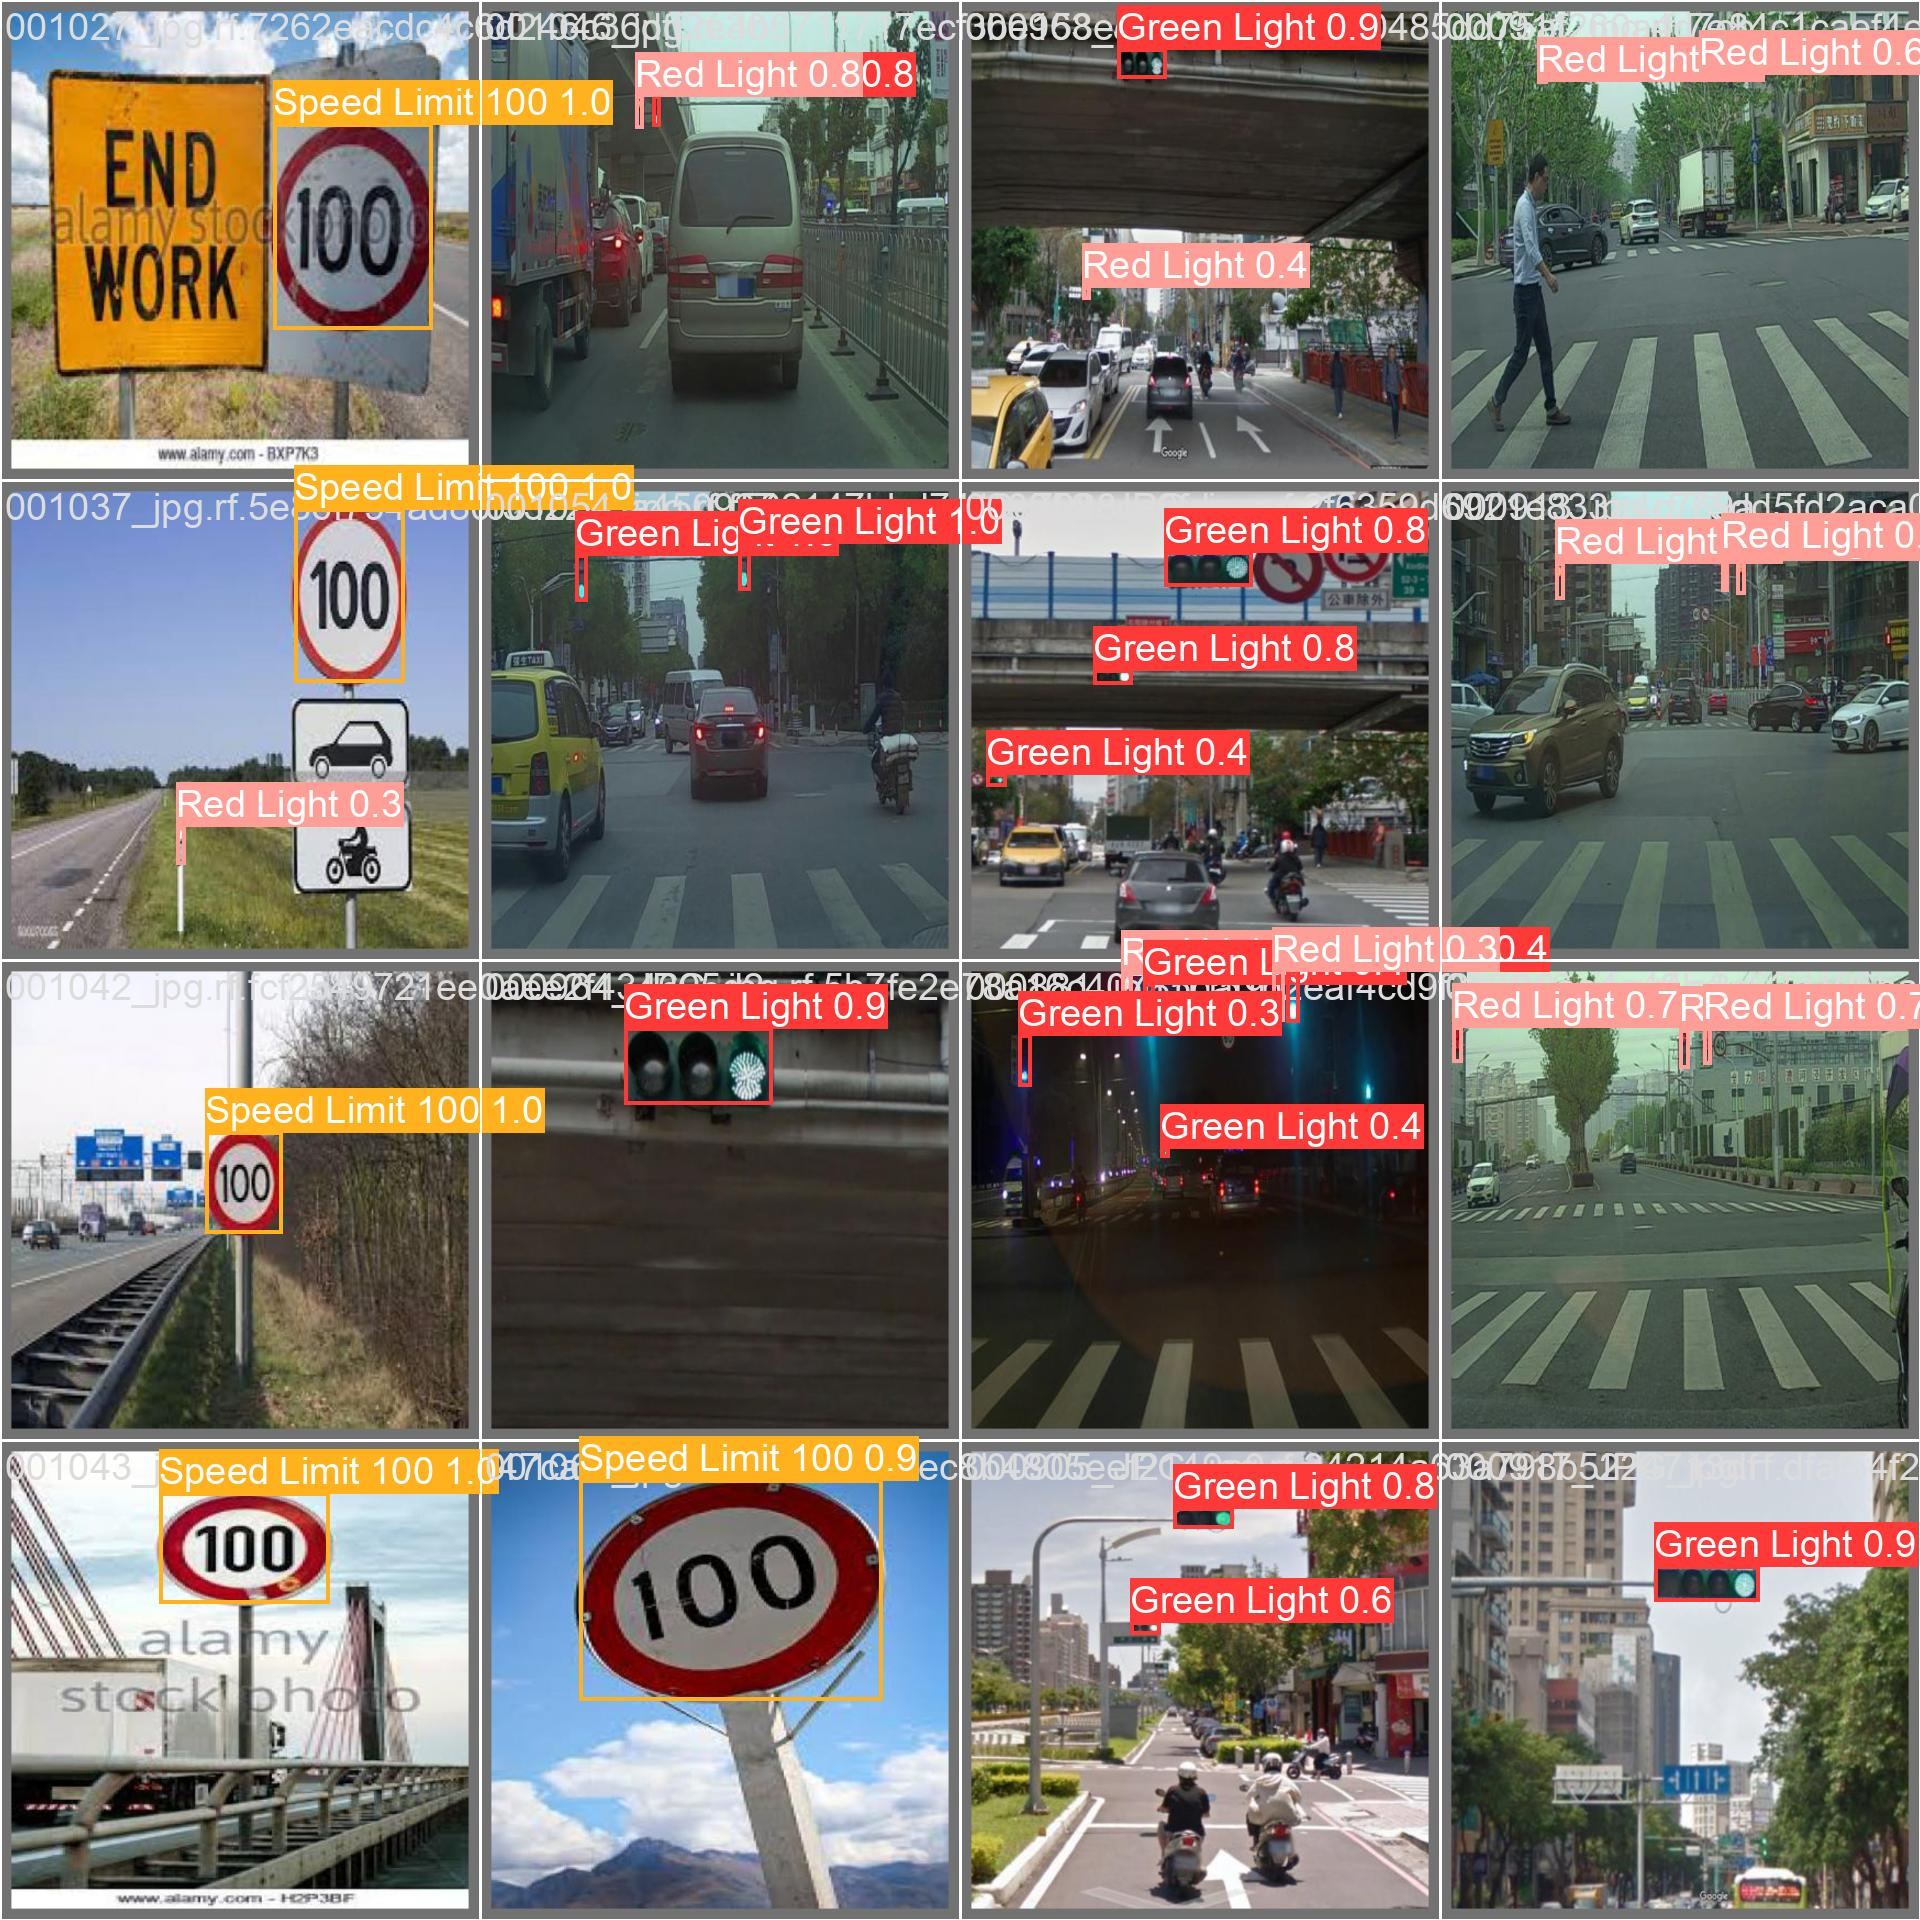

In [29]:
Image(filename = '/content/runs/detect/val2/val_batch1_pred.jpg', width = 500)

## Inference with Model

In [25]:
!yolo task=detect mode=predict model=/content/runs/detect/train2/weights/best.pt data=/content/road_signs/data.yaml conf = 0.25 source = /content/road_signs/test/images

Ultralytics YOLOv8.1.17 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3008573 parameters, 0 gradients, 8.1 GFLOPs

image 1/638 /content/road_signs/test/images/000003_jpg.rf.8511b9c219dbf9799a6d58900b15917d.jpg: 640x640 1 Speed Limit 30, 11.2ms
image 2/638 /content/road_signs/test/images/000006_jpg.rf.89610ec419ccfab22f8314026b90ee26.jpg: 640x640 1 Speed Limit 30, 7.4ms
image 3/638 /content/road_signs/test/images/00000_00000_00003_png.rf.d18afc3c9625ffb1974029d3e3762aee.jpg: 640x640 1 Speed Limit 20, 7.3ms
image 4/638 /content/road_signs/test/images/00000_00000_00005_png.rf.ab60a274676963d378f5014e89d9e2b1.jpg: 640x640 1 Speed Limit 20, 7.3ms
image 5/638 /content/road_signs/test/images/00000_00000_00006_png.rf.9d1ea68507aff6973a1dbcdc6f4422a8.jpg: 640x640 1 Speed Limit 20, 7.3ms
image 6/638 /content/road_signs/test/images/00000_00000_00008_png.rf.ff305dcd6e9ceb9188937311a4a1b207.jpg: 640x640 1 Speed Limit 20, 7.3ms
image 7/638 /content

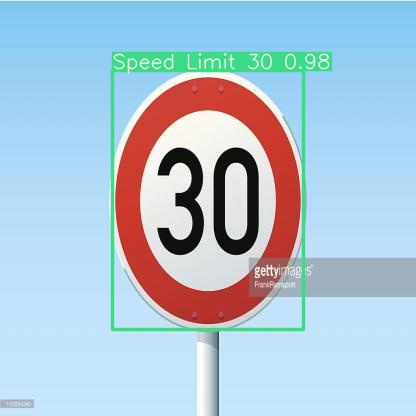

In [27]:
Image(filename = '/content/runs/detect/predict/000003_jpg.rf.8511b9c219dbf9799a6d58900b15917d.jpg', width = 500)